<a href="https://colab.research.google.com/github/chrisart10/Tensorflowpresentation2022/blob/main/TensorflowPresentation2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Verificar la version de python

In [14]:
!python --version

Python 3.7.12


Verificar si tensorflow esta instalado y que version tiene.

In [15]:
!pip list | grep tensorflow

tensorflow                    2.7.0
tensorflow-datasets           4.0.1
tensorflow-estimator          2.7.0
tensorflow-gcs-config         2.7.0
tensorflow-hub                0.12.0
tensorflow-io-gcs-filesystem  0.23.1
tensorflow-metadata           1.5.0
tensorflow-probability        0.15.0


In [16]:
# Es importante que solo importen lo que van a usar. 
import tensorflow as tf 

# Ejemplo 1 (Funcional)


In [5]:
# NumPy es un proyecto de código abierto que tiene como objetivo habilitar la computación numérica con Python.
import numpy as np

In [79]:
# Dataset 
# Usamos arreglos con numpy. Tensorflow esta integrado con numpy y esto evitara errores de compatibilidad.
y = np.array([2,4,6,8,10,12,14,16],dtype="float64") #  Respuestas
x = np.array([1,2,3,4,5,6,7,8],dtype="float64")     #  Datos de entrada
(x.shape,y.shape)

((8,), (8,))

In [80]:
#Capa 0 que recibira los datos 
Layer_0 = tf.keras.layers.Input(shape=(1,),name="Layer_0")
Layer_0

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Layer_0')>

In [81]:
#Creamos la capa 1. En esta se realizara la operacion matematica Z = W*X + b
Layer_1 = tf.keras.layers.Dense(1,name="Layer_1")(Layer_0)
Model = tf.keras.Model(inputs=Layer_0,outputs = Layer_1,name="modelo_v1")

In [82]:
Model.summary()

Model: "modelo_v1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_0 (InputLayer)        [(None, 1)]               0         
                                                                 
 Layer_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


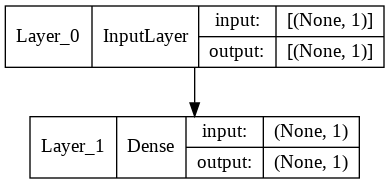

In [83]:
tf.keras.utils.plot_model(Model,show_shapes=True)

In [84]:
# Compilar el modelo
Model.compile(optimizer="sgd",
                     loss="mean_squared_error",
                     )
# Entrenar el modelo
# y = np.array([2,4,6,8,10,12,14,16],dtype="float64") #  Respuestas
# x = np.array([1,2,3,4,5,6,7,8],dtype="float64")     #  Datos de entrada

history = Model.fit(x,
                  y,
                  epochs=20,
                  # verbose=2,
                  batch_size=1 #32 es lo recomendado
                         )

Epoch 1/20
8/8 [==============================] - 0s 2ms/step - loss: 1.3185
Epoch 2/20
8/8 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 3/20
8/8 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 4/20
8/8 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 5/20
8/8 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 6/20
8/8 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 7/20
8/8 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 8/20
8/8 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 9/20
8/8 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 10/20
8/8 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 11/20
8/8 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 12/20
8/8 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 13/20
8/8 [==============================] - 0s 2ms/step - loss: 0.

In [85]:
xs_test = np.array([10],dtype="float64")
ys_test = np.array([20],dtype="float64")

prediction = Model.predict(xs_test)
print("La predicción es: " + str(prediction) + "\nEl valor esperado es: " + str(ys_test[0]))

La predicción es: [[19.914217]]
El valor esperado es: 20.0


# **Ejemplo** 2 

In [71]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

In [72]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [73]:
history = model.fit(x_train, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2973 - accuracy: 0.9148
Epoch 2/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1462 - accuracy: 0.9569
Epoch 3/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1086 - accuracy: 0.9666
Epoch 4/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0874 - accuracy: 0.9732
Epoch 5/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0762 - accuracy: 0.9758
Epoch 6/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0670 - accuracy: 0.9788
Epoch 7/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0580 - accuracy: 0.9808


In [74]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0723 - accuracy: 0.9795


[0.07233486324548721, 0.9794999957084656]

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


y=cv2.imread('/content/dato de prueba.png')   #image outside mnist data
y1=cv2.resize(y,(28,28))                #you need to resize it on the bsis pf your  modeL's image shape
plt.imshow(y1)

temp = cv2.cvtColor(y1,cv2.COLOR_BGR2YCrCb)  #since its a three channel image i hav econverted into this so rbg are represented in the luminance one 
temp=255-temp                                #negative image
plt.imshow(temp)

X = np.zeros((temp.shape[0], temp.shape[1],1), dtype=float)    #array of (28,28,1)
X[:,:,0] = temp[:, :,0].astype(float) / 255           #fitting the data of temp image in that zeros and normalizing it
prediccion = model.predict(X.reshape(1,28,28,1))       #finally the value of image
Resultado = np.argmax(prediccion, axis=1) + 1
print('El resultado es :', Resultado[0])